<a href="https://colab.research.google.com/github/GitZy6666/ZyRep/blob/main/Klasifikasi_LVQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from random import seed 
from random import randrange
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
class lvqClassifier():

  def __init__(self, b, learn_rate, max_epoch=10):
    self.b = b
    self.max_epoch = max_epoch
    self.learn_rate = learn_rate 

    pass

  def lvq_fit(self, train, target):
    self.train = train
    self.target = target

    self.label, train_idx = np.unique(self.target, return_index=True)
    self.weight = self.train[train_idx].astype(np.float64)
    self.train = np.array([e for i, e in enumerate(zip(self.train, self.target)) if i not in train_idx])
    self.train, self.target = self.train[:,0], self.train[:,1]
    self.epoch = 0
    
    while self.epoch < self.max_epoch:
      for i, x in enumerate(self.train):
        distance = [sum((w-x)**2) for w in self.weight]
        min = np.argmin(distance)
        sign = 1 if self.target[1] == self.label[min] else -1
        # self.weight[min] = sign * self.learn_rate * (x - self.weight[min])
        self.weight[min] = self.weight[min] + (self.learn_rate * (x + (self.weight[min]*sign)))

      self.learn_rate *= self.b
      self.epoch += 1

    return self.weight, self.label

  def lvq_predict(self, test, w):
    predict = np.array([])  
    weight, label = w

    for i, x in enumerate(test):
      d = [sum((w - x) ** 2) for w in weight]
      
      diagnosis = label[np.argmin(d)]
      predict = np.append(predict, [diagnosis])

    return predict

In [ ]:
class cross_validaton():
  
  def __init__(self):
    pass

  # Split a dataset into k folds
  def cross_validation_split(self, dataset, folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
      fold = list()
      while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
      dataset_split.append(fold)
    return dataset_split

  def cross_validation_score(self, estimator, dataset, folds):
    self.estimator = estimator
    self.dataset = dataset
    self.folds = folds

    spesifisitasAF = np.array([])
    sensitivitasAF = np.array([])
    f1scoreAF = np.array([])
    akurasiAF = np.array([])

    spesifisitasN = np.array([])
    sensitivitasN = np.array([])
    f1scoreN = np.array([])
    akurasiN = np.array([])

    spesifisitasPVC = np.array([])
    sensitivitasPVC = np.array([])
    f1scorePVC = np.array([])
    akurasiPVC = np.array([])

    acuracy = np.array([])

    datafold = self.cross_validation_split(self.dataset, self.folds)
    datafold = np.asarray(datafold)

    print("K-Fold Cross-Validation")
    print("Dengan k = "+str(self.folds))
    print(" ")

    dimensi_model = dataset.shape[1]
    for i in range(self.folds):
      dataTest = np.array(datafold[i,:,:])
      dataTrain = np.delete(datafold, i, axis=0)
      dataTrain = np.array(dataTrain)
      dataTrain = dataTrain.reshape(-1,dimensi_model)

      X_train = np.array(dataTrain[:, 0:dimensi_model-1])
      y_train = np.array(dataTrain[:, dimensi_model-1])
      X_test = np.array(dataTest[:, 0:dimensi_model-1])
      y_test = np.array(dataTest[:, dimensi_model-1])

      trainWeight = self.estimator.lvq_fit(X_train, y_train)
      predictY = self.estimator.lvq_predict(X_test, trainWeight)
      
      score = accuracy_score(y_test, predictY)

      cm = confusion_matrix(y_test, predictY)

      TPA = cm[0,0]
      TNA = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
      FPA = cm[1,0]+cm[2,0]
      FNA = cm[0,1]+cm[0,2]

      TPN = cm[1,1]
      TNN = cm[0,0]+cm[2,0]+cm[0,2]+cm[2,2]
      FPN = cm[1,0]+cm[1,2]
      FNN = cm[1,0]+cm[1,2]

      TPP = cm[2,2]
      TNP = cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
      FPP = cm[0,2]+cm[1,2]
      FNP = cm[2,0]+cm[2,1]

      Presisi_AF = TPA/(TPA+FPA) 
      if math.isnan(Presisi_AF) == True:
         Presisi_AF = 0.00
      Spesifisitas_AF = TNA/(TNA+FPA)
      if math.isnan(Spesifisitas_AF) == True:
         Spesifisitas_AF = 0.00
      Sensitivitas_AF =  TPA/(TPA+FNA)
      if math.isnan(Sensitivitas_AF) == True:
         Sensitivitas_AF = 0.00
      F1_Score_AF = 2 * ((Presisi_AF * Sensitivitas_AF)/(Presisi_AF + Sensitivitas_AF))
      if math.isnan(F1_Score_AF) == True:
         F1_Score_AF = 0.00
      Akurasi_AF = (TPA + TNA)/(TPA + FPA + FNA + TNA)
      if math.isnan(Akurasi_AF) == True:
         Akurasi_AF = 0.00

      Presisi_N = TPN/(TPN+FPN)
      if math.isnan(Presisi_N) == True:
         Presisi_N = 0.00
      Spesifisitas_N = TNN/(TNN+FPN)
      if math.isnan(Spesifisitas_N) == True:
         Spesifisitas_N = 0.00
      Sensitivitas_N =  TPN/(TPN+FNN)
      if math.isnan(Sensitivitas_N) == True:
         Sensitivitas_N = 0.00
      F1_Score_N = 2 * ((Presisi_N * Sensitivitas_N)/(Presisi_N + Sensitivitas_N))
      if math.isnan(F1_Score_N) == True:
         F1_Score_N = 0.00
      Akurasi_N = (TPN + TNN)/(TPN + FPN + FNN + TNN)
      if math.isnan(Akurasi_N) == True:
         Akurasi_N = 0.00

      Presisi_PVC = TPP/(TPP+FPP)
      if math.isnan(Presisi_PVC) == True:
         Presisi_PVC = 0.00
      Spesifisitas_PVC = TNP/(TNP+FPP)
      if math.isnan(Spesifisitas_PVC) == True:
         Spesifisitas_PVC = 0.00
      Sensitivitas_PVC =  TPP/(TPP+FNP)
      if math.isnan(Sensitivitas_PVC) == True:
         Sensitivitas_PVC = 0.00
      F1_Score_PVC = 2 * ((Presisi_PVC * Sensitivitas_PVC)/(Presisi_PVC + Sensitivitas_PVC))
      if math.isnan(F1_Score_PVC) == True:
         F1_Score_PVC = 0.00
      Akurasi_PVC = (TPP + TNP)/(TPP + FPP + FNP + TNP)
      if math.isnan(Akurasi_PVC) == True:
         Akurasi_PVC = 0.00

      spesifisitasAF = np.append(spesifisitasAF, Spesifisitas_AF)
      spesifisitasN = np.append(spesifisitasN, Spesifisitas_N)
      spesifisitasPVC = np.append(spesifisitasPVC, Spesifisitas_PVC)

      sensitivitasAF = np.append(sensitivitasAF, Sensitivitas_AF)
      sensitivitasN = np.append(sensitivitasN, Sensitivitas_N)
      sensitivitasPVC = np.append(sensitivitasPVC, Sensitivitas_PVC)

      f1scoreAF = np.append(f1scoreAF, F1_Score_AF)
      f1scoreN = np.append(f1scoreN, F1_Score_N)
      f1scorePVC = np.append(f1scorePVC, F1_Score_PVC)

      akurasiAF = np.append(akurasiAF, Akurasi_AF)
      akurasiN = np.append(akurasiN, Akurasi_N)
      akurasiPVC = np.append(akurasiPVC, Akurasi_PVC)

      acuracy = np.append(acuracy, score)

      print("Iterasi Ke-"+str(i+1)+" :")
      print(confusion_matrix(y_test, predictY))
      print(classification_report(y_test, predictY))
      print("Akurasi AF        ", round(Akurasi_AF,2))
      print("Akurasi Normal    ", round(Akurasi_N,2))
      print("Akurasi PVC       ", round(Akurasi_PVC,2))
      print(" ")

    print("K-Fold Cross-Validation")
    print("Dengan k = "+str(self.folds))
    print(" ")
    print("AF")
    print("Spesifisitas : ", round(spesifisitasAF.mean(),2))
    print("Sensitivitas : ", round(sensitivitasAF.mean(),2))
    print("F1 Score     : ", round(f1scoreAF.mean(),2))
    print("Akurasi      : ", round(akurasiAF.mean(),2))
    print(" ")
    print("Normal")
    print("Spesifisitas : ", round(spesifisitasN.mean(),2))
    print("Sensitivitas : ", round(sensitivitasN.mean(),2))
    print("F1 Score     : ", round(f1scoreN.mean(),2))
    print("Akurasi      : ", round(akurasiN.mean(),2))
    print(" ")
    print("PVC")
    print("Spesifisitas : ", round(spesifisitasPVC.mean(),2))
    print("Sensitivitas : ", round(sensitivitasPVC.mean(),2))
    print("F1 Score     : ", round(f1scorePVC.mean(),2))
    print("Akurasi      : ", round(akurasiPVC.mean(),2))
    print(" ")
    print("Acuracy : ",acuracy)
    print("Mean Acuracy : ", acuracy.mean())  

In [ ]:
import pandas as pd

data = pd.read_csv("datasetFx1.csv")
data.sample(n=10)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,desc,label
81,90.835883,660.531920,110.756402,87.531278,145.219538,0.842105,0.684211,61.849148,102.666868,124.809470,40255.73178,0.822589,0.144300,6.23960.24800,AF
74,89.285714,672.000000,141.798650,90.862013,193.030089,0.923077,0.846154,105.500000,136.484388,156.548006,67124.39571,0.871837,0.106293,6.16200.16700,AF
19,83.945594,714.748649,120.210093,96.870615,194.683400,0.941176,0.882353,91.712500,137.246290,95.565999,41205.37698,1.436141,0.529681,3.7700.9300,PVC
88,118.607974,505.868180,92.731031,65.240708,113.344473,0.871795,0.717949,53.858077,80.119314,83.911966,21120.83065,0.954802,0.430256,7.7700.9260,PVC
52,91.281451,657.307692,147.276759,86.115193,182.069584,0.958333,0.958333,124.000000,128.662659,160.843858,65013.99839,0.799923,0.643651,5.14000.15000,AF
2,101.888446,588.879331,141.673136,100.503504,186.636554,0.888889,0.888889,123.678700,131.684965,148.097312,61267.93447,0.889179,0.261540,1.3050.4050,AF
30,83.798883,716.000000,85.386182,78.122900,113.076302,0.750000,0.500000,87.000000,78.532438,96.950213,23919.25875,0.810029,0.279330,4.5050.5250,AF
47,82.085582,730.944444,143.259078,136.850629,230.486609,0.923077,0.846154,79.000000,162.889660,105.742290,54111.81520,1.540440,0.304021,5.9000.10000,AF
77,90.447969,663.364815,101.836954,87.133675,148.511181,0.969697,0.818182,67.773333,104.915620,99.691044,32858.38175,1.052408,0.544822,6.19000.20500,PVC
14,81.404629,737.058824,121.309750,74.931976,201.122742,1.000000,0.928571,116.000000,141.649079,83.017410,36943.05510,1.706258,0.079808,3.2630.3430,PVC


In [ ]:
dataset = data[['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'label']]
dataset.head(n=5)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
0,95.275428,629.753143,171.525577,90.483643,185.627225,0.909091,0.818182,115.79875,131.194012,173.100312,71344.70304,0.757907,0.113507,AF
1,97.193733,617.323750,181.249188,138.833634,286.355128,1.000000,0.800000,185.66700,202.402918,167.298639,106379.77060,1.209830,0.405310,AF
2,101.888446,588.879331,141.673136,100.503504,186.636554,0.888889,0.888889,123.67870,131.684965,148.097312,61267.93447,0.889179,0.261540,AF
3,94.900146,632.243493,188.842372,72.566311,230.568362,1.000000,1.000000,172.41520,163.026168,179.154506,91756.09611,0.909975,0.211104,AF
4,98.921133,606.543800,163.855814,96.144362,213.936146,1.000000,0.909091,128.83360,144.742605,176.601372,80304.58254,0.819601,0.549934,AF


In [ ]:
df_norm = dataset[['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
103,0.196687,0.671331,0.413826,0.529761,0.315195,0.693182,0.300000,0.122782,0.303823,0.230544,0.128348,0.319244,0.213164
67,0.439153,0.389761,0.516411,0.471387,0.336927,0.754545,0.466667,0.382919,0.337067,0.470000,0.272223,0.121118,0.051792
25,0.352164,0.479168,0.655344,0.239784,0.774544,1.000000,1.000000,0.593315,0.772441,0.359357,0.446794,0.563647,0.222705
116,0.259760,0.587660,0.286667,0.377742,0.199829,0.437500,0.041667,0.139531,0.196358,0.169737,0.067946,0.281845,0.001831
60,0.431397,0.397291,0.312211,0.498815,0.351102,0.539773,0.500000,0.100817,0.351033,0.198426,0.127099,0.452248,0.540606


In [ ]:
from sklearn.preprocessing import StandardScaler
# men-scaling dataset
scale_X = StandardScaler()
df_norm = scale_X.fit_transform(df_norm)
df_norm[:5]

array([[ 0.66277691, -0.74771806,  1.78288265,  0.52789095,  0.88250674,
         0.6030894 ,  0.77130172,  1.40386   ,  0.89894502,  1.67210104,
         1.59861944, -0.74798778, -0.96347763],
       [ 0.81307598, -0.87018987,  2.01140695,  2.06992312,  2.44188551,
         0.99440722,  0.71553431,  3.1992105 ,  2.46102304,  1.55314631,
         2.99207042,  0.37838397,  0.63279664],
       [ 1.18090627, -1.15046417,  1.08129058,  0.84745561,  0.89813226,
         0.51612989,  0.98817496,  1.60634499,  0.90971483,  1.15945144,
         1.19783577, -0.42080748, -0.15367757],
       [ 0.63337366, -0.72317964,  2.18986196, -0.04354872,  1.578245  ,
         0.99440722,  1.32897577,  2.85868922,  1.59723283,  1.79623336,
         2.4104425 , -0.36897397, -0.42958479],
       [ 0.94841758, -0.97640905,  1.60262788,  0.70842893,  1.32075999,
         0.99440722,  1.05013874,  1.73880648,  1.19615446,  1.74388511,
         1.95498105, -0.59422353,  1.42395006]])

Text(0, 0.5, 'Cumulative explained variance')

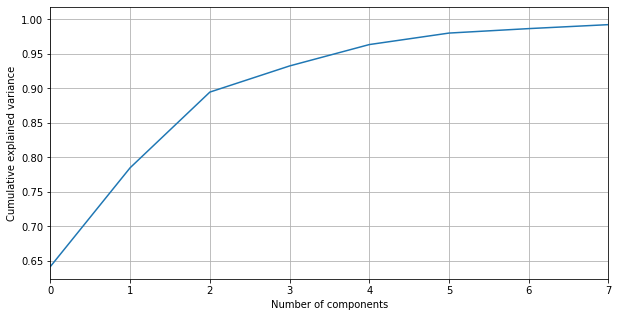

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

pca = PCA()
pca.fit(df_norm)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.grid(True,which='both')
plt.plot(exp_var_cumul)
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
pecea_data = PCA(n_components=5)
pecea_data.fit(df_norm)
pecea_dataframeX = pecea_data.transform(df_norm)
pecea_dataframeX[:5]

array([[ 3.41610112, -1.80208262,  0.43596966, -0.12964502, -0.15104888],
       [ 6.26491637, -0.51565516, -1.05344895,  0.89532419,  0.50941535],
       [ 3.38502541, -0.60057443,  0.82787488,  0.09891563,  0.03172858],
       [ 4.93167947, -1.58245733, -0.1451943 ,  0.24982526, -1.25501166],
       [ 4.4094424 , -0.21615222,  0.37295527,  1.53836128, -0.4515174 ]])

In [ ]:
df_norm_pca = pd.DataFrame(pecea_dataframeX)
df_norm_pca[:5]

,0,1,2,3,4
0,3.416101,-1.802083,0.435970,-0.129645,-0.151049
1,6.264916,-0.515655,-1.053449,0.895324,0.509415
2,3.385025,-0.600574,0.827875,0.098916,0.031729
3,4.931679,-1.582457,-0.145194,0.249825,-1.255012
4,4.409442,-0.216152,0.372955,1.538361,-0.451517


In [ ]:
diagnosa = data[['label']]
diagnosa.sample(n=5)

,label
125,Normal
137,Normal
63,AF
52,AF
138,Normal


In [ ]:
df = pd.concat([df_norm_pca, diagnosa], axis=1)
df.sample(n=5)

,0,1,2,3,4,label
14,1.870930,0.171440,-1.646512,-1.817987,-0.901263,PVC
11,0.054566,-0.477446,1.736504,-0.062933,-1.303602,PVC
127,-4.073548,0.518077,1.171226,-0.859343,0.660047,Normal
99,-2.358318,0.147738,-0.564410,0.306072,0.736968,Normal
22,0.275352,3.858444,-1.550745,-0.776531,-1.805406,PVC


In [ ]:
df_arr = np.array(df)
df_arr[:5]

array([[3.4161011150262417, -1.8020826201534421, 0.4359696561425683,
        -0.1296450150753408, -0.1510488795181778, 'AF'],
       [6.264916366765414, -0.5156551612903398, -1.0534489511304077,
        0.8953241891067951, 0.5094153512184425, 'AF'],
       [3.3850254075623063, -0.6005744264883716, 0.8278748831457147,
        0.09891562941722663, 0.03172858128451706, 'AF'],
       [4.931679469884079, -1.5824573342317627, -0.1451942972395865,
        0.24982526341734004, -1.2550116561319131, 'AF'],
       [4.409442404352724, -0.2161522226464438, 0.372955266053447,
        1.5383612756367993, -0.45151739888171893, 'AF']], dtype=object)

In [ ]:
df_arr.shape

(139, 6)

In [ ]:
LVQ = lvqClassifier(b=.2, learn_rate=.07)

In [ ]:
kfoldCV = cross_validaton()

In [ ]:
kfoldCV.cross_validation_score(LVQ, dataset=df_arr, folds=5)

K-Fold Cross-Validation
Dengan k = 5
 
Iterasi Ke-1 :
[[9 0 1]
 [0 8 0]
 [5 1 3]]
              precision    recall  f1-score   support

          AF       0.64      0.90      0.75        10
      Normal       0.89      1.00      0.94         8
         PVC       0.75      0.33      0.46         9

    accuracy                           0.74        27
   macro avg       0.76      0.74      0.72        27
weighted avg       0.75      0.74      0.71        27

Akurasi AF         0.78
Akurasi Normal     1.0
Akurasi PVC        0.74
 
Iterasi Ke-2 :
[[10  0  0]
 [ 1  8  0]
 [ 6  0  2]]
              precision    recall  f1-score   support

          AF       0.59      1.00      0.74        10
      Normal       1.00      0.89      0.94         9
         PVC       1.00      0.25      0.40         8

    accuracy                           0.74        27
   macro avg       0.86      0.71      0.69        27
weighted avg       0.85      0.74      0.71        27

Akurasi AF         0.74
Akurasi